In [1]:
!pip install torch
!pip install monai
!pip install opencv-python
!pip install pyexasol
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import sys
%cd drive
%cd MyDrive
%cd Colab Notebooks
sys.path.append('//content/drive/MyDrive/Colab Notebooks/train_data_images_z_intensity')
sys.path.append('//content/drive/MyDrive/Colab Notebooks/')
sys.path.append('//content/drive/MyDrive/Colab Notebooks/lidar')



/content/drive
/content/drive/MyDrive
/content/drive/MyDrive/Colab Notebooks


In [4]:
from google.colab import drive
import monai.networks.nets
import torch
from lidar.classifier_net import classifier_network, create_network
import os
import numpy as np

torch.cuda.empty_cache()  


In [5]:
def scale_y(y):
    """translates a list of labels with unsorted numbers to a labeling starting with [0,1,2,...]

    Args:
        y (_type_): _description_

    Returns:
        _type_: _description_
    """
    labels = np.unique(y)
    y_new = [i for i in range(len(labels))]
    translator = {key:value for (key,value) in zip(labels, y_new)}
    y = [translator[i] for i in y]
    return y, translator
        

label_folders = [x[0] for x in os.walk('//content/drive/MyDrive/Colab Notebooks/train_data_images_z_intensity/')]
folder_list = list(map(lambda x: int(x.split('/')[-1]), label_folders[1:]))
#labels, _ = scale_y(label_folders)
#print(labels)

{'LAT_NAME': 'Abies', 'DT_NAME': ' \tTannen ', 'ID_FAMILIE': 1}
{1: 45819, 2: 463, 3: 242}
(926,) (926,)
cuda
pos weight: 1
2  classes to classify
labels train set {0: 299, 1: 321}
labels val/test-set {0: 164, 1: 142}
91
215
epoch 1  off  200
mean loss: 0.688907 in step     0 of   620
mean loss: 0.771830 in step   160 of   620
mean loss: 0.428414 in step   320 of   620
mean loss: 0.605888 in step   480 of   620
epoch  1 mean loss:  0.7138723775263756
epoch  1 mean validation loss:  0.7639282825200454
accuracy:  0.5362318844898887
new best accuracay!
0.41975308678768297 in test set with mean loss:  tensor(0.8776, device='cuda:0', grad_fn=<DivBackward0>)
newx best acc in testset!
epoch 2  off  200
mean loss: 0.591610 in step     0 of   620
mean loss: 0.702983 in step   160 of   620
mean loss: 0.706759 in step   320 of   620
mean loss: 0.484354 in step   480 of   620
epoch  2 mean loss:  0.7365991094420034
epoch  2 mean validation loss:  0.684983043566994
accuracy:  0.5724637689797775
new

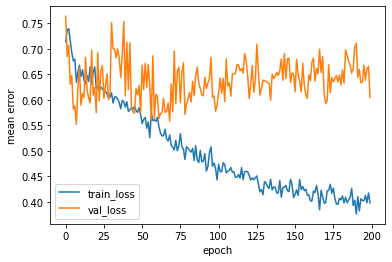

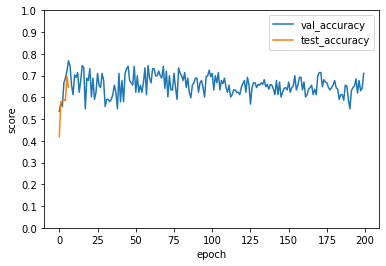

In [ ]:
drop = 0.0
network_name = "DENSE121_2_class_kein_drop_200"

network = create_network(folder_list,taxon='class', size=128, name=network_name,drop=drop,n_min=400, n_max=463)
network.get_data()
network.train(200) 

In [19]:
!curl ipecho.net/plain

35.185.175.140

{'LAT_NAME': 'Abies', 'DT_NAME': ' \tTannen ', 'ID_FAMILIE': 1}
{1: 34054, 2: 372, 3: 150}
(744,) (744,)
cuda
pos weight: 1
2  classes to classify
labels train set {0: 239, 1: 259}
labels val/test-set {0: 133, 1: 113}
73
173
epoch 1  off  150
mean loss: 0.670441 in step     0 of   498
mean loss: 0.757369 in step   160 of   498
mean loss: 0.607595 in step   320 of   498
mean loss: 0.584382 in step   480 of   498
epoch  1 mean loss:  0.7146471333503723
epoch  1 mean validation loss:  0.6415895380471882
accuracy:  0.6578947368421053
new best accuracay!
0.6704545454545454 in test set with mean loss:  tensor(0.6423, device='cuda:0', grad_fn=<DivBackward0>)
newx best acc in testset!
epoch 2  off  150
mean loss: 0.619166 in step     0 of   498
mean loss: 0.794730 in step   160 of   498
mean loss: 1.038903 in step   320 of   498
mean loss: 0.559415 in step   480 of   498
epoch  2 mean loss:  0.6635013608932495
epoch  2 mean validation loss:  0.6132921905894029
accuracy:  0.6973684210526315
new

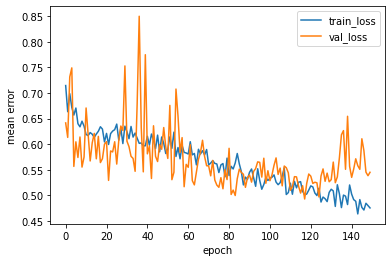

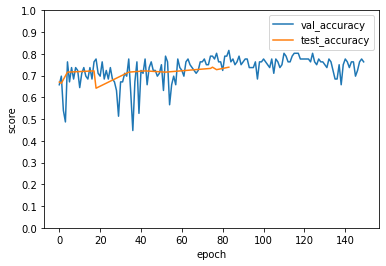

In [ ]:
drop = 0.2


network_name = "DENSE121_2_class_drop_2"

network = create_network(folder_list,taxon='class', size=128, name=network_name,drop=drop,n_min=151, n_max=372)
network.get_data()
network.train(150) 

{'LAT_NAME': 'Abies', 'DT_NAME': ' \tTannen ', 'ID_FAMILIE': 1}
{1: 34054, 2: 372, 3: 150}
(894,) (894,)
cuda
pos weight: 1
3  classes to classify
labels train set {0: 244, 1: 250, 2: 104}
labels val/test-set {0: 128, 1: 122, 2: 46}
88
208
epoch 1  off  100
mean loss: 1.111279 in step     0 of   598
mean loss: 0.954614 in step   160 of   598
mean loss: 1.042728 in step   320 of   598
mean loss: 1.027924 in step   480 of   598
epoch  1 mean loss:  1.0581262159347533
epoch  1 mean validation loss:  1.0778131430799311
accuracy:  0.4659090909090909
new best accuracay!
0.4951923076923077 in test set with mean loss:  tensor(1.0238, device='cuda:0', grad_fn=<DivBackward0>)
newx best acc in testset!
epoch 2  off  100
mean loss: 0.597890 in step     0 of   598
mean loss: 1.122533 in step   160 of   598
mean loss: 1.085214 in step   320 of   598
mean loss: 1.000467 in step   480 of   598
epoch  2 mean loss:  1.0385095040003458
epoch  2 mean validation loss:  1.0484607138416984
accuracy:  0.5
new

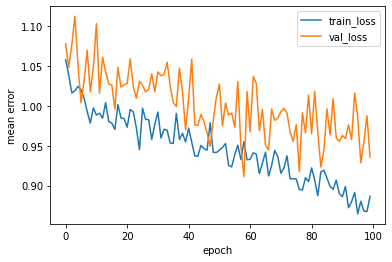

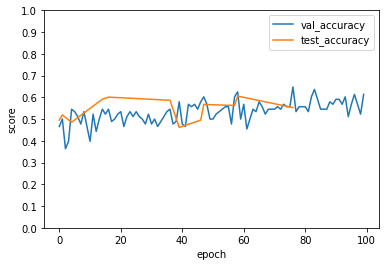

In [ ]:
drop = 0.2


network_name = "3_class_drop2"

network = create_network(folder_list,taxon='class', size=156, name=network_name,drop=drop,n_min=10, n_max=372)
network.get_data()
network.train(100) 

{'LAT_NAME': 'Abies', 'DT_NAME': ' \tTannen ', 'ID_FAMILIE': 1}
{1: 34054, 2: 522}
(1052,) (1052,)
cuda
pos weight: 1
2  classes to classify
labels train set {0: 343, 1: 361}
labels val/test-set {0: 187, 1: 161}
104
244
epoch 1  off  100
mean loss: 0.788008 in step     0 of   704
mean loss: 0.698903 in step   160 of   704
mean loss: 0.726402 in step   320 of   704
mean loss: 0.587851 in step   480 of   704
mean loss: 0.913509 in step   640 of   704
epoch  1 mean loss:  0.7089003862982447
epoch  1 mean validation loss:  0.6276308940007136
accuracy:  0.6538461538461539
new best accuracay!
0.6721311475409836 in test set with mean loss:  tensor(0.6273, device='cuda:0', grad_fn=<DivBackward0>)
newx best acc in testset!
epoch 2  off  100
mean loss: 0.562840 in step     0 of   704
mean loss: 0.489078 in step   160 of   704
mean loss: 0.683690 in step   320 of   704
mean loss: 0.919735 in step   480 of   704
mean loss: 0.565218 in step   640 of   704
epoch  2 mean loss:  0.6887721454894001
epo

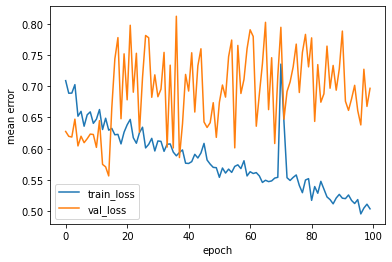

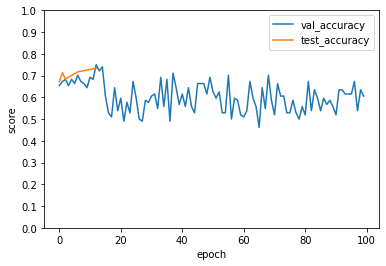

In [ ]:
drop = 0.2

torch.cuda.empty_cache()  

network_name = "2_class_drop2_gingko_to_conif"

network = create_network(folder_list,taxon='class', size=128, name=network_name,drop=drop,n_min=10, n_max=530, gingko_to_conifera=True)
network.get_data()
network.train(100) 

GELSENKIRCHEN !!!!


In [ ]:
label_folders = [x[0] for x in os.walk('//content/drive/MyDrive/Colab Notebooks/train_data_images_z_intensity_gelsenkirchen/')]
folder_list = list(map(lambda x: int(x.split('/')[-1]), label_folders[1:]))

{'LAT_NAME': 'Abies', 'DT_NAME': ' \tTannen ', 'ID_FAMILIE': 1}
{1: 45822, 2: 463, 3: 242}
(926,) (926,)
cuda
pos weight: 1
2  classes to classify
labels train set {0: 299, 1: 321}
labels val/test-set {0: 164, 1: 142}
91
215
epoch 1  off  150
mean loss: 0.696207 in step     0 of   620
mean loss: 0.601524 in step   160 of   620
mean loss: 0.963472 in step   320 of   620
mean loss: 0.548969 in step   480 of   620
epoch  1 mean loss:  0.6831461366145841
epoch  1 mean validation loss:  0.7325245090152906
accuracy:  0.5652173913043478
new best accuracay!
0.6666666666666666 in test set with mean loss:  tensor(0.6415, device='cuda:0', grad_fn=<DivBackward0>)
newx best acc in testset!
epoch 2  off  150
mean loss: 0.333037 in step     0 of   620
mean loss: 0.605641 in step   160 of   620
mean loss: 0.826737 in step   320 of   620
mean loss: 0.518494 in step   480 of   620
epoch  2 mean loss:  0.6706713430343135
epoch  2 mean validation loss:  0.7078929154769235
accuracy:  0.5833333341971688
new

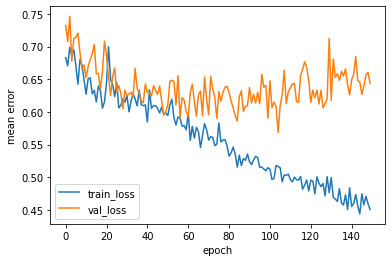

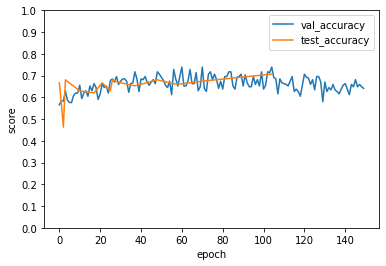

In [ ]:
drop = 0.2


network_name = "DENSE121_2_class_drop_2_gelsenkirchen"

network = create_network(folder_list,taxon='class', size=128, name=network_name,drop=drop,n_min=250, n_max=463)
network.get_data()
network.train(150) 

{'LAT_NAME': 'Abies', 'DT_NAME': ' \tTannen ', 'ID_FAMILIE': 1}
{1: 45822, 2: 463, 3: 242}
(726,) (726,)
cuda
pos weight: 1
3  classes to classify
labels train set {0: 154, 1: 157, 2: 175}
labels val/test-set {0: 88, 1: 85, 2: 67}
72
168
epoch 1  off  100
mean loss: 1.041042 in step     0 of   486
mean loss: 1.166156 in step   160 of   486
mean loss: 1.133215 in step   320 of   486
mean loss: 0.763715 in step   480 of   486
epoch  1 mean loss:  1.0513630631517192
epoch  1 mean validation loss:  1.0707037846247356
accuracy:  0.4583333333333333
new best accuracay!
0.4166666666666667 in test set with mean loss:  tensor(1.0996, device='cuda:0', grad_fn=<DivBackward0>)
newx best acc in testset!
epoch 2  off  100
mean loss: 1.203829 in step     0 of   486
mean loss: 1.008162 in step   160 of   486
mean loss: 1.234182 in step   320 of   486
mean loss: 1.229056 in step   480 of   486
epoch  2 mean loss:  1.0383027552581223
epoch  2 mean validation loss:  1.0582980480459
accuracy:  0.4861111111

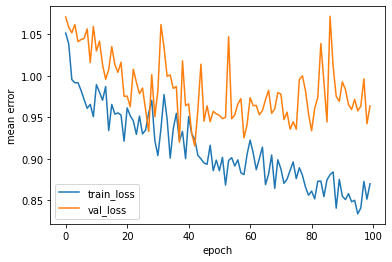

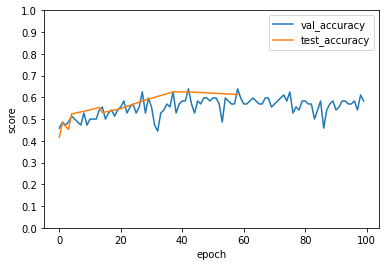

In [ ]:
drop = 0.3


network_name = "3_class_drop2_gelsi"

network = create_network(folder_list,taxon='class', size=256, name=network_name,drop=drop,n_min=10, n_max=242)
network.get_data()
network.train(100) 

{'LAT_NAME': 'Abies', 'DT_NAME': ' \tTannen ', 'ID_FAMILIE': 1}
{1: 45822, 2: 705}
(1400,) (1400,)
cuda
pos weight: 1
2  classes to classify
labels train set {0: 478, 1: 460}
labels val/test-set {0: 222, 1: 240}
138
324
epoch 1  off  100
mean loss: 0.744197 in step     0 of   938
mean loss: 0.726618 in step   160 of   938
mean loss: 0.391438 in step   320 of   938
mean loss: 0.718233 in step   480 of   938
mean loss: 0.580704 in step   640 of   938
mean loss: 0.863451 in step   800 of   938
epoch  1 mean loss:  0.6966335107671454
epoch  1 mean validation loss:  0.6615596771240234
accuracy:  0.6285714285714286
new best accuracay!
0.5925925925925926 in test set with mean loss:  tensor(0.6825, device='cuda:0', grad_fn=<DivBackward0>)
newx best acc in testset!
epoch 2  off  100
mean loss: 0.605301 in step     0 of   938
mean loss: 0.526454 in step   160 of   938
mean loss: 0.749546 in step   320 of   938
mean loss: 0.744575 in step   480 of   938
mean loss: 0.552556 in step   640 of   938


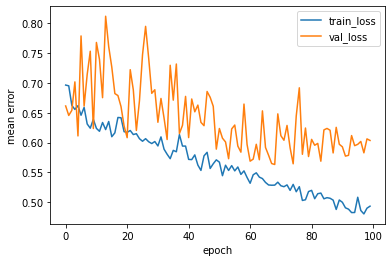

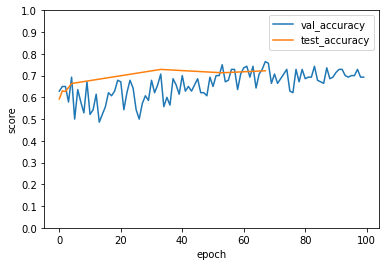

In [ ]:
drop = 0.2


network_name = "2_class_drop2_gingko_to_conif_gelsi"

network = create_network(folder_list,taxon='class', size=128, name=network_name,drop=drop,n_min=10, n_max=700, gingko_to_conifera=True)
network.get_data()
network.train(100) 

Nochmal nach Ordnung!


{'LAT_NAME': 'Abies', 'DT_NAME': ' \tTannen ', 'ID_FAMILIE': 1}
[ 1  1  1 ... 13 13 13]
{1: 309, 13: 3548}
(618,) (618,)
cuda
pos weight: 1
2  classes to classify
labels train set {0: 198, 1: 216}
labels val/test-set {0: 111, 1: 93}
61
143
epoch 1  off  250
mean loss: 0.681740 in step     0 of   414
mean loss: 1.310682 in step   160 of   414
mean loss: 0.813148 in step   320 of   414
epoch  1 mean loss:  0.7905533179067649
epoch  1 mean validation loss:  0.9659747406840324
accuracy:  0.328125
new best accuracay!
0.4768518524037467 in test set with mean loss:  tensor(0.8196, device='cuda:0', grad_fn=<DivBackward0>)
newx best acc in testset!
epoch 2  off  250
mean loss: 0.438204 in step     0 of   414
mean loss: 0.849432 in step   160 of   414
mean loss: 0.820298 in step   320 of   414
epoch  2 mean loss:  0.7402863660110877
epoch  2 mean validation loss:  0.6235055550932884
accuracy:  0.71875
new best accuracay!
0.59259259286854 in test set with mean loss:  tensor(0.6585, device='cuda:0

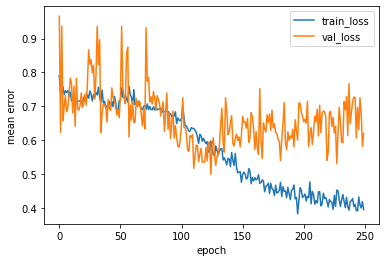

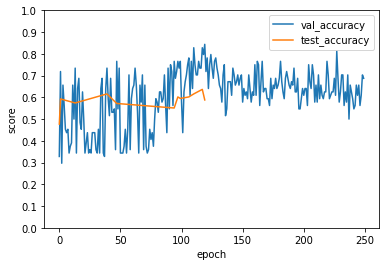

In [31]:
drop = 0.0

#Aufteilung{1: 34054, 2: 372, 3: 150}
#kieferngewächse gegen Buchengewächse (Eiche, Buche, Kastanien)
network_name = "kieferngewächseSchirmtannen_gegen_Buchengewächse_d00_"
folder_list = [1, 19, 46,47,48,49,50, 17, 80, 81]
network =create_network(folder_list,taxon="order", size=128, name=network_name,drop=drop,n_min=1, n_max=309)
network.get_data()
network.train(250) 
